In [65]:
import pandas as pd
import numpy as np
from IPython.display import clear_output


Disposed Time
count                           7270
mean     234 days 12:34:39.779917468
std      196 days 09:38:16.503330014
min                  0 days 00:00:00
25%                 43 days 00:00:00
50%                207 days 00:00:00
75%                367 days 00:00:00
max               2097 days 00:00:00
Name: disposal_time, dtype: object


Pending Times
count                           3795
mean     658 days 13:14:02.719665464
std      133 days 14:37:39.116156512
min         414 days 02:32:24.063539
25%         537 days 02:32:24.063539
50%         712 days 02:32:24.063539
75%         765 days 02:32:24.063539
max        1625 days 02:32:24.063539
Name: pending_time, dtype: object

Case numbers by stage


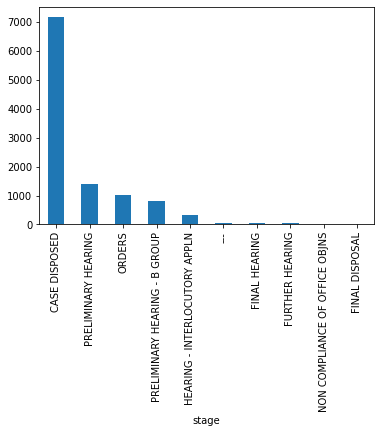

In [163]:
#2020 data
df = pd.read_csv('2020records.csv')
df = clean_df(df)
process(df)

Index(['P1', 'P2', 'P3', 'P4', 'P_Total', 'P_Advocate', 'R1', 'R2', 'R3', 'R4',
       'R_Total', 'R_adv', 'filing_number', 'filing_year', 'filing_date',
       'registration_number', 'registration_year', 'registration_date', 'cnr',
       'judge', 'bench', 'statute', 'provision', 'first_hearing', 'stage',
       'category', 'sub_category', 'sub_sub_category', 'last_hearing_date',
       'disposed_date', 'disposal_type', 'Unnamed: 31', 'disposal_time',
       'pending_time'],
      dtype='object')

Disposed Time
count                           9240
mean     265 days 16:57:49.090909092
std      300 days 00:00:33.896172820
min                  0 days 00:00:00
25%                 23 days 00:00:00
50%                110 days 00:00:00
75%                544 days 00:00:00
max               1113 days 00:00:00
Name: disposal_time, dtype: object


Pending Times
count                            6898
mean      976 days 05:34:50.671880288
std        97 days 02:52:28.492734726
min          779 days

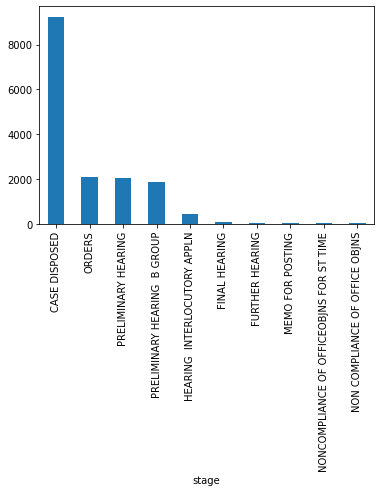

In [162]:
#2019 data
df = pd.read_csv('2019records_new.csv')
df=clean_df(df)
print(df.columns)
process(df)



Disposed Time
count                            159
mean     222 days 14:20:22.641509432
std      189 days 16:02:06.881820476
min                  3 days 00:00:00
25%                 48 days 00:00:00
50%                175 days 00:00:00
75%                378 days 00:00:00
max                681 days 00:00:00
Name: disposal_time, dtype: object


Pending Times
count                            168
mean     635 days 00:49:32.634967568
std      145 days 20:22:24.198126556
min         415 days 02:32:24.063539
25%         487 days 02:32:24.063539
50%         639 days 02:32:24.063539
75%         765 days 20:32:24.063539
max         855 days 02:32:24.063539
Name: pending_time, dtype: object

Case numbers by stage


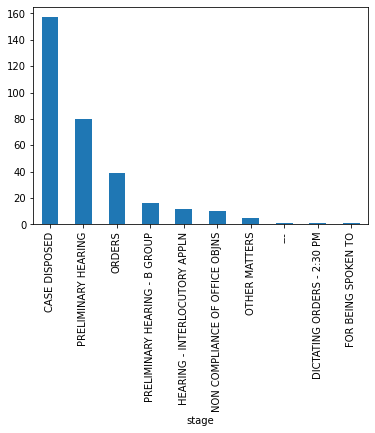

In [164]:
#The process function can also process subviews
bmp = df[df.sub_sub_category=='BMP-Bangalore Mahanagara Palike ( 90 )']
process(bmp)


In [159]:
#Process the data and return details on pendency and stage
def process(df):
    print_disposal_time(df)
    print_pending_time(df)

    #Plot of cases by stage
    print("\nCase numbers by stage")
    df.groupby('stage').count()['P1'].sort_values(ascending=False)[:10].plot(kind='bar')

def print_disposal_time(df):
    print("\nDisposed Time")
    print(df.disposal_time.describe())

def print_pending_time(df):
    #For cases not disposed, pending time data
    print("\n\nPending Times")
    print(df[df.stage!='CASE DISPOSED'].pending_time.describe())

def clean_df(df):
    
    df = df.dropna(how='all', axis='columns')
    df = df.replace(r'^\s*$', np.nan, regex=True)
    df.filing_date = pd.to_datetime(df.filing_date, format="%d/%m/%Y")
    df.disposed_date = pd.to_datetime(df.disposed_date)
    clear_output()


    df['disposal_time'] = df.disposed_date - df.filing_date 
    df['pending_time'] = pd.to_datetime('today') - df.filing_date #Filter undisposed before accessing

    return df

    